<a href="https://colab.research.google.com/github/kaveripriyap/scrabble-python/blob/main/Scrabble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-Game**




> **Imports**



In [ ]:
# Add any necessary imports here

import random
import copy
import time
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.font_manager as fontmng


#**In-Game: Gameplay**



# 'init_game' function





In [ ]:
yesWords = ['y', 'yes', 'ya', 'yep', 'yup', 'sure', 'ok', 'okay', 'alright', 'istd', 'indeed', 'norhino', 'obviously', 'affirmative ', 'aye', 'yea', 'mhmm']
# Function to initialize the game.
# Possible options to choose number of players or alternative board layout/tile count should be implemented here
# Outputs selected board, shuffled bag of tiles and number of players

def init_game():
  print(' ___   ___  ____    __    ____  ____  __    ____ ')
  print('/ __) / __)(  _ \  /__\  (  _ \(  _ \(  )  ( ___)')
  print('\__ \( (__  )   / /(__)\  ) _ < ) _ < )(__  )__)') 
  print('(___/ \___)(_)\_)(__)(__)(____/(____/(____)(____)')
  print(' ')
  filename = 'Scrabble_rules.txt'
  with open (filename,'r') as f:
    for line in f:
      print('\033[1m' + line + '\033[0m')

  """
  Board flags: [[letter value],[letter multiplier],[word multiplier]]
  Score multipliers:
  1 = None
  2 = Double Letter/Word
  3 = Triple Letter/Word
  """

  board = [ [[0,1,3],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,3],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,3]],
            [[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1]],
            [[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1]],
            [[0,2,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,2,1]],
            [[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,1,1]],
            [[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1]],
            [[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1]],
            [[0,1,3],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,3]],
            [[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1]],
            [[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1]],
            [[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,1,1]],
            [[0,2,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,2,1]],
            [[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1],[0,1,1]],
            [[0,1,1],[0,1,2],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,3,1],[0,1,1],[0,1,1],[0,1,1],[0,1,2],[0,1,1]],
            [[0,1,3],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,1],[0,1,3],[0,1,1],[0,1,1],[0,1,1],[0,2,1],[0,1,1],[0,1,1],[0,1,3]]]

  bag = ["a","a","a","a","a","a","a","a","a","b","b","c","c","d","d","d","d","e","e","e","e","e","e","e","e","e","e","e","e","f","f","g","g","g",
        "h","h","i","i","i","i","i","i","i","i","i","j","k","l","l","l","l","m","m","n","n","n","n","n","n","o","o","o","o","o","o","o","o","p",
        "p","q","r","r","r","r","r","r","s","s","s","s","t","t","t","t","t","t","u","u","u","u","v","v","w","w","x","y","y","z","#","#"]
  
  random.shuffle(bag)

  num_players = 2

  return board, bag, num_players

# 'whos_turn' function

In [ ]:
# Decides whos turn it is
def whos_turn(game_turns,num_players):
  
  turn = {0: player1, 1: player2}  
  player = turn[(game_turns % num_players)]

  return player

#'turn' function

In [ ]:
def turn(player):

  displayHand(player.hand)
  response = input("What would you like to do? (play / swap / skip / end game)\n").lower()
  
  if response == "play":
    play()
    player.turn = False
  
  elif response == "swap": 
    if game.turns == 0:
      print("You cannot swap tiles on the first turn!")
    else:
      swap()
      player.turn = False

  elif response == "skip":
    if game.turns == 0:
      print("You cannot skip the first turn!")
    else:
      player.turn = False

  elif response == "end game" or response == "endgame" or response == "end":
    game.bag = []
    player.hand = []
    player.turn = False

  else:
    print("Please enter a valid response!")

  return

#'swap' function

In [ ]:
def swap():
  
  swap = False
  while swap == False:  
    ongoing = True
    while ongoing == True:

      print("Tiles left in bag: {}".format(len(game.bag)))
      tiles_to_swap = input("Please enter tiles to swap. Or, type 'cancel'.\n")

      tempswap = []
      temphand = player.hand[:]
      
      if tiles_to_swap == "cancel":
        swap = True
        break
      
      if len(tiles_to_swap) > len(player.hand):
        print("You can only swap tiles from your hand!")
        continue

      elif len(tiles_to_swap) > len(game.bag):
        print("Sorry, there are only {} tiles left in the bag. Please choose fewer tiles to swap.".format(len(game.bag)))
        continue

      for i in tiles_to_swap:
        if i not in temphand:
          print("You can only swap tiles from your hand!")
          ongoing = True
          break
        else:
          tempswap.append(i)
          temphand.remove(i)
          ongoing = False

    response = input("Please confirm that you would like to swap the following letters: {}. (y/n)\n".format(tempswap)).lower()

    if response in yesWords:
      player.hand = temphand[:]
      for i in range(len(tempswap)):
        if len(game.bag) > 0:
          player.hand.append(game.bag.pop(0))
      game.bag += tempswap
      random.shuffle(game.bag)
      swap = True
    else:
      swap = False

  return

#'play' function

In [ ]:
def play():                                                                     # Loop for option to play letters
  while player.turn == True:
    temp.word = word_to_play()
    if temp.word == "*":                                                        # Looks for placeholder value if player skips
      player.turn = False                                                       # Ends the player's turn and breaks the loop
      continue
    else:
      valid, played_letter_coordinates = choose_placement()                     # Checks for physical validity of move, e.g. correct inputs, play not out of bounds etc
      if valid == False:
        print("Thats not a valid move!")
        continue
      elif valid == "back":                                                     # Checks if the user wants to backpedal his input
        continue
      elif check_validity(played_letter_coordinates) == False:                  # Checks for validity according to game rules, e.g. must be adjacent to other tiles
        print("Thats not a valid move!")
        continue
      else:
        score, wordlist = count_score(scoring_words(played_letter_coordinates)) # Nested functions. First comes up with a list of scored words, then calculates the score of those words
        if check_words(wordlist) == False:
          continue
        else:
          player.score += sum(score)
          print("Points: {}".format(sum(score)))
          print("Total Points: {}".format(player.score))
          input("Press enter to continue...\n")
          
          player.hand = temp.hand[:]                                            # Commits the move by equating the players hand's to the temporary hand
          game.board = temp.board[:]                                            # Ditto for the game board
          
          for i in range(7 - len(player.hand)):                                 # Checks to see if there are tiles left in the bag
            player.hand.append(game.bag.pop(0))                                 # Draws tiles to make 7 in the players hand
          player.turn = False                                                   # Ends the player's turn and breaks the loop
          break

#'word_to_play' function

In [ ]:
def word_to_play():
  play = False
  while play == False:  
    ongoing = True                                                              # 2 nested loops for 2 inputs, to allow player to backpedal or for them to correct invalid moves
    while ongoing == True:

      tiles_to_play = input("Please enter tiles to play. (EXCLUDE letters already on the board!) Or, type '*' to skip.\n").lower()

      temp.play = []
      temp.hand = player.hand[:]                                                # Populates the temp object to allow for easy reversion if necessary
      
      if tiles_to_play == "*":                                                  # If user decides to skip his turn
        play = True                                                             # "Played" loop is broken, function exits
        break
      
      if len(tiles_to_play) > len(player.hand):                                 # Ensures player does not play more tiles than he has
        print("You can only play tiles from your hand!")
        continue

      for i in tiles_to_play:
        if i not in temp.hand:
          print("You can only play tiles from your hand!")                      # Ensures player only plays tiles he has
          ongoing = True
          break

        elif i == "#":                                                          # Allows the player to designate a letter for the blank tile
          while True:
            blank = input("Please choose a letter for the blank tile:\n")
            if len(blank) > 1 or blank.isalpha() == False:                      # Checks validity of input
              print("Please enter a single letter only!")
            else:
              temp.play.append(blank + '*')                                     # Appends to temp.play the chosen letter plus an indicator (*) to distinguish it from a regular tile. Needed for score counting
              temp.hand.remove(i)                                               # Removes the tile from temp.hand. This method is necessary to allow for duplicate letters
              ongoing = False                                                   # Finishes the "ongoing" loop, allowing player to move to the next input loop ("played")
              break

        else:
          temp.play.append(i)                                                   # Appends to temp.play the letters from tiles_to_play
          temp.hand.remove(i)                                                   # Removes the letters from temp.hand
          ongoing = False

    if tiles_to_play == "*":                                                    # Confirms if player wants to skip turn
      response = input("Please confirm that you would like to skip: (y/n)\n").lower()
    else:
      response = input("Please confirm that you would like to play the following letters: {}. (y/n)\n".format(temp.play)).lower()

    if tiles_to_play == "*" and response in yesWords:                           # Player has confirmed he wants to skip
      played_word = "*"                                                         # Assigns a placeholder value to "played_word" to skip subsequent functions in the main play() function
      temp.play = []                                
      temp.hand = []                                                            # Blanks out the temporary object for use in the next loop
      play = True                                                               # Breaks out of the "Played" loop

    elif response in yesWords:                                                  # Player has confirmed letters he wants to play
      played_word = []                                                          
      for i in temp.play:
        played_word.append(i[:])                                                # Appends each letter to played_word
      play = True                                                               # Breaks out of the "Played" loop
    else:
      temp.play = []                                                            # Blanks out the temporary object for the next loop
      play = False                                                              # Repeat the loop
                                                                                # Displays remaining letters in player's hand, currently still the temporary object
  print(played_word)

  return played_word

#'choose_placement' function

In [ ]:
def choose_placement():

  coord = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7,"I":8,"J":9,"K":10,"L":11,"M":12,"N":13,"O":14} # To be moved to global once done
  valid_letters = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O"]                            # To be moved to global once done
  valid_numbers = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]                      # To be moved to global once done

  valid = False
  chosen = False                                                                                                          # 2 nested loops for 2 input fields
  while chosen == False:
    while True:
      coordinate = input("Please enter the starting tile in the format 'B3', or go back: \n")

      if coordinate == "back":                                                                                            # Assigns placeholder value to "valid", to indicate to skip subsequent function
        valid = "back"
        break                                                                                                             # Breaks out of the loop

      if coordinate[0:1].upper() not in valid_letters or coordinate[1:] not in valid_numbers:                             # Checks input against dictionary of valid inputs
        print("Please enter a valid coordinate!")

      else:
        x = int(coordinate[1:]) - 1                                                                                       # Converts input to matrix coordinates
        y = coord[coordinate[0:1].upper()]
        break

    while True:
      if coordinate == "back":                                                                                            # Checks for "Back" placeholder
        direction = "*"                                                                                                   # Assigns another placeholder to skip subsequent function
        chosen = True
        break

      direction = input("Please enter the direction you want to play, or go back (right / down / back):\n")
      direction = direction.lower()                                                                                       # Forces lowercase to prevent errors

      if direction != "down" and direction != "right" and direction != "back":                                            # Checks for input validity
        print("Please enter a valid input!")

      elif (direction == "right" and x + len(temp.word) > 15) or (direction == "down" and y + len(temp.word) > 15):       # Checks to ensure move will not be out of bounds
        print("That move is not valid!")

      elif direction == "back":                                                                                           # Checks for intention to backpedal
        break

      else:
        chosen = True                                                                                                     # Allows the chosen coordinate and direction. Breaks out of the "Chosen" loop
        break

  played_letter_coordinates = []
  temp.board = copy.deepcopy(game.board)                                                                                  # Creates a temporary deepcopy of the board

  if direction == "*":                                                                                                    # Checks for placeholder to skip. "Valid" remains false and is passed outside the function to repeat the previous loop in the main play() function
    pass

  elif direction == "down":
    valid = True                                                                                                          # Confirms validity of the move. Passed outside the function to indicate the next function can be run
    j = 0
    i = 0
    while j < len(temp.word):                                                                                             
      if len(temp.board[y+i][x]) == 4:
        i += 1
        continue
      else:
        temp.board[y+i][x].append(temp.word[j])
        
        if len(temp.word[j]) == 1:                                                                                        # Appends the letter score if the tile was not a blank (Blank letter str len == 2, e.g. "A*")
          temp.board[y+i][x][0] = points[temp.word[j]]
        
        played_letter_coordinates.append([y+i,x])
        j += 1
        i += 1

  elif direction == "right":
    valid = True
    j = 0
    i = 0
    while j < len(temp.word):
      if len(temp.board[y][x+i]) == 4:
        i += 1
        continue
      else:
        temp.board[y][x+i].append(temp.word[j])
        
        if len(temp.word[j]) == 1:                                                                                          # Appends the letter score if the tile was not a blank (Blank letter str len == 2, e.g. "A*")
          temp.board[y][x+i][0] = points[temp.word[j]]

        played_letter_coordinates.append([y,x+i])
        j += 1
        i += 1


  return valid, played_letter_coordinates

# 'scoring_words' function

In [ ]:
def scoring_words(played_letter_coordinates):                # Looks for words on the board that were just played

  x_words = []
  y_words = []
  scored_words_coordinates = []
                                                             # Finds all scorable horizontal words on the board
  for i in range(15):
    for j in range(15):
      if len(temp.board[i][j]) > 3:                          # Checks if board square is occupied
        x_words.append([i,j][:])                             # Appends its coordinates to a list
      else:
        x_words.append("*")                                  # Appends a placeholder for blank squares

  size = len(x_words)                                        # Splits list based on value
  idx_list = [idx + 1 for idx, val in
              enumerate(x_words) if val == "*"]              # Looks for "*" indicating board space is empty
    
  x_words = [x_words[i: j] for i, j in
          zip([0] + idx_list, idx_list + 
          ([size] if idx_list[-1] != size else []))]         
                                                                        
  for i in x_words:                                          # Remove spaces
    if "*" in i:
      i.remove("*")

  while [] in x_words:                                       # Remove empty lists 
    x_words.remove([])

  x_templist = []                                            # Removes single item lists as single letters are not counted as words
  for i in x_words:                                          # templist required to prevent modifying the list being iterated
    if len(i) != 1:
      x_templist.append(i[:])

  for i in x_templist:                                       # Remove lists without coordinates of recently played letters i.e. removes all words on the board that were unmodified
    while True:
      for j in i:
        if j in played_letter_coordinates:
          scored_words_coordinates.append(i[:])
          break
      break

                                                            # Repeat for vertical words
  for i in range(15):
    for j in range(15):
      if len(temp.board[j][i]) > 3:
        y_words.append([j,i][:])
      else:
        y_words.append("*")

  size = len(y_words) 
  idx_list = [idx + 1 for idx, val in
              enumerate(y_words) if val == "*"] 
    
  y_words = [y_words[i: j] for i, j in
          zip([0] + idx_list, idx_list + 
          ([size] if idx_list[-1] != size else []))] 

  for i in y_words:
    if "*" in i:
      i.remove("*")

  while [] in y_words:
    y_words.remove([])

  y_templist = []
  for i in y_words:
    if len(i) != 1:
      y_templist.append(i[:])

  for i in y_templist:
    while True:
      for j in i:
        if j in played_letter_coordinates:
          scored_words_coordinates.append(i[:])
          break
      break

  return scored_words_coordinates

# 'count_score' function

In [ ]:
# Definition for counting words score

points = {"a": 1 , "b": 3 , "c": 3 , "d": 2 ,    # To be moved to global once done
          "e": 1 , "f": 4 , "g": 2 , "h": 4 ,
          "i": 1 , "j": 8 , "k": 5 , "l": 1 ,
          "m": 3 , "n": 1 , "o": 1 , "p": 3 ,
          "q": 10, "r": 1 , "s": 1 , "t": 1 ,
          "u": 1 , "v": 4 , "w": 4 , "x": 8 ,
          "y": 4 , "z": 10, "#": 0}


def count_score(scored_word_coordinates):
  board_values = []
  score = []

  for i in scored_word_coordinates:     # Pulls board values for each of the words played
    temp_list = []
    for j in i: 
      temp_list.append(temp.board[j[0]][j[1]][:])
    board_values.append(temp_list[:])

  wordlist = []
  for i in board_values:
    word = ""
    for j in i:
      word += j[3]
    wordlist.append(word)

  for i in board_values:
    word_score = 0
    for j in i:                         # Adds score after letter multipliers
      word_score += j[0] * j[1]         # Letter value x Board letter multipliers

    for k in i:
      word_score *= k[2]                # Multiplies letters score with word multipliers

    score.append(word_score)

  if len(temp.word) == 7:               # Checks for bingo bonus (All 7 letters in hand played)
    score.append(50) 

  for i in scored_word_coordinates:     # Removes the multipliers from the board
    for j in i:
      temp.board[j[0]][j[1]][1] = 1
      temp.board[j[0]][j[1]][2] = 1

  print("Played words: {}".format(wordlist))

  return score, wordlist

# 'display' function


In [ ]:
font = fontmng.FontProperties()          #Changing font style to DejaVu Sans Mono
font.set_family('monospace')
font.set_name('DejaVu Sans Mono')

# Display player hand
def displayHand(hand):
  img_rack = mpimg.imread('Scrabble_rack.png') # Import Scrabble rack image
  fig = plt.figure(figsize = (10,10))          # Resize image output
    
  for x , tile in enumerate(hand):             # Run through the tiles in the player's hands,  index of tile is used to determine its coordinates
    plt.text((130 + x*333), (210), '   ', fontsize = 45, bbox={'facecolor': 'burlywood', 'alpha': 1,'pad': 5}) # Print tile background
    plt.text((145 + x*331), (220), tile.upper(), fontproperties = font, fontsize = 45)                         # Print letter
    plt.text((335 + x*331), (250), points[tile.lower()], fontsize = 10, horizontalalignment='right')           # Print tile value
    
  plt.imshow(img_rack) #Plot out the scrabble rack image and text
  plt.pause(0.5)

# Display scrabble board
def displayBoard(board):
  img_board = mpimg.imread('Scrabble_board.png') # Import Scrabble board image
  fig = plt.figure(figsize = (14,14))            # Resize image output

  for y, clmn in enumerate(board):               # Run through the board's matrix, using the row and column number to determine the tile's placement
    for x, row in enumerate(clmn):
      if len(row) == 4:                          # Check if tile is present at coordinate
        plt.text((59 + x*65.3), (94 + y*65.3), '   ', fontsize = 38, bbox={'facecolor': 'burlywood', 'alpha': 0.9,'pad': 3}) # Print tile backgorund
        if len(row[3]) > 1:   # Check if the tile is a blank tile i.e A*, don't print tile points if it is a blank tile
          plt.text((61 + x*65.3), (97 + y*65.3), row[3][0].upper(), fontproperties = font, fontsize = 40)                    # Print letter without *
        else:
          plt.text((61 + x*65.3), (97 + y*65.3), row[3].upper(), fontproperties = font, fontsize = 40)                       # Print letter
          plt.text((100 + x*65.3), (102 + y*65.3), points[row[3].lower()], fontsize = 10)                                    # Print tile value

  plt.title(label='{}   {} : {}   {}'.format(player1.name, player1.score, player2.score, player2.name), fontsize=40, pad='10.0') # Show players' scores at top of board
  plt.imshow(img_board) #Plot out the scrabble board image and text
  plt.pause(0.5)

# **In-Game: Algorithmn Checking**

# 'check_validity' function

In [ ]:
def check_validity(played_letter_coordinates):
  if game.turns == 0:                                                                                         # Checks that first word must be played in the center of the board
    if [7,7] not in played_letter_coordinates:
      return False

  else:
    if max(len(i) for i in scoring_words(played_letter_coordinates)) > len(played_letter_coordinates):        # Checks if there is a scored word on the board longer than just the played letters. Implies letters were played adjacent to existing ones and hence move is valid
      return True

    elif len(scoring_words(played_letter_coordinates)) >= 2:                                                  # If not, checks if there is more than 1 scored word. Again implies letters were played adjacent to existing ones
      return True
    
    else:                                                                                                     # All other options are invalid
      return False


# 'check_words' function

In [ ]:
def check_words(wordlist):
  for word in wordlist: # Loop through all the word in the wordlist
    check_word = word[:]
    check_word = check_word.replace('*','')
    filepath = 'Lexicon_{}.txt'.format(check_word[0].upper()) # Set file path according to the keys obtained before
    with open(filepath,'r') as f:       # Open the scrabble lexicon file
        lexicon = (f.read()).splitlines() # Read every word in the scrabble lexicon file
        if check_word.upper() not in lexicon:               # Check if word is in lexicon
        # If one of the words is not in lexicon, print invalid word message, and exit function, returning False
          print('{} is an invalid word!'.format(word))
          return False
  if len(wordlist) > 1:  
    print(', '.join(wordlist) + ' are all valid words!')    #If all the words are valid, return True
  else:
    print(', '.join(wordlist) + ' is a valid word!') 

  return True

# **End-Game:**

#'game-end' function



In [ ]:
def game_end():                               # To check if endgame comditions are met
  game_end = False
  if game.bag == [] and player.hand == []:
    game_end = True
  return game_end


# **Game Logic**

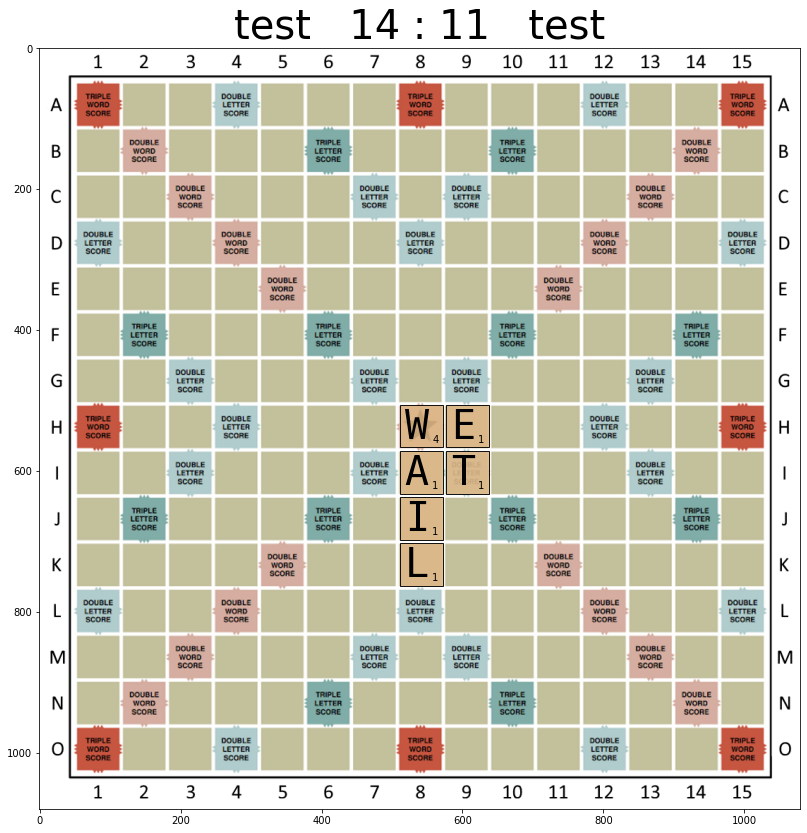

It is test's turn!
Press Enter when ready



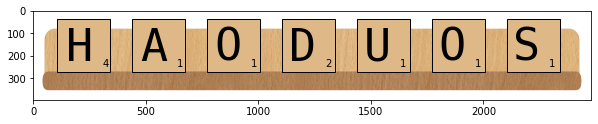

What would you like to do? (play / swap / skip / end game)
adfsadf
Please enter a valid response!


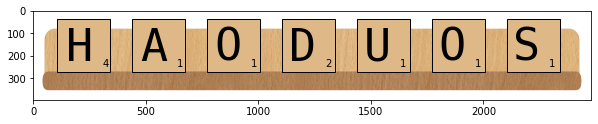

In [ ]:
# Defining classes here. Needs to be in the same code cell as the game logic

class player1:
  def __init__(self,name,hand,score,turn):
    self.name = name
    self.hand = hand
    self.score = score
    self.turn = turn

class player2:
  def __init__(self,name,hand,score,turn):
    self.name = name
    self.hand = hand
    self.score = score
    self.turn = turn

class game:
  def __init__(self,board,bag,num_players,turns):
    self.name = "game"
    self.board = board
    self.bag = bag
    self.players = num_players
    self.turns = 0

class temp:
  def __init__(self,board,play,hand,word):
    self.name = "temp"
    self.board = board
    self.play = play
    self.hand = hand
    self.word = word

# Game logic starts here

gamestart = init_game()                                                         # Initialize the game and allow the user to input desired options

game = game(gamestart[0],gamestart[1],gamestart[2],0)                           # Takes input from init_game() and initializes an instance of the class "game" with the selected options
temp = temp([],[],[],"")

pre_game = input("Please Enter when you're ready to start the game.")
p1name = input("Please enter your name, Player 1.")                             #input("Please enter name for Player 1:") -> Player name input here. Currently commented out for ease of testing
p2name = input("Please enter your name, Player 2.")
print("Game is initializing...")

player1 = player1(p1name,[],0,True)                                             # Instantiating instances of player classes
player2 = player2(p2name,[],0,False)

for i in range(7):                                                              # Filling players hands from bag
  player1.hand.append(game.bag.pop(0))
  player2.hand.append(game.bag.pop(0))

while game_end() == False:
  player = whos_turn(game.turns,game.players)
  player.turn = True
  time.sleep(3)
  clear_output()

  displayBoard(game.board)

  print("It is {}'s turn!".format(player.name))
  input("Press Enter when ready\n")
 
  while player.turn == True:
    turn(player)
 
  game.turns += 1

print("Game over!")
print("{}'s Score: {}\t {}'s Score:{}".format(player1.name, player1.score, player2.name, player2.score))


# Bugs / To-Do

- Letter from blank tiles will take the tile score of the chosen letter (Should be 0)
- Streamline player classes (Only 1 required)
- Sometimes player doesnt switch?? (Should be fixed)
- First turn cannot be swap / skip, subsequent failure to play any word
- Does not print player's hand after swapping tiles (only prints it in the player's subsequent turn)
- Player's hand printed again after invalid response for 'what would you like to do?'


# Fixed

- Cancelling move after choosing letter for blank tile replaces chosen letter in player.hand instead of "#"
- Players not drawing new tiles after turn
- Added clear output function
- Fixed word extension ~~(If extending a word, player needs to enter the first tile of the whole word)
e.g (TRAIN -> TRAINER, start tile needs to be 'T')~~
- Added confirmation after display scores and rules. ~~(Rules gets cleared immediately after being displayed for 5 seconds (suggest to only start game after player presses enter))~~